In [2]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

import re
from wordcloud import WordCloud, STOPWORDS

from __future__ import print_function


df = pd.read_csv("posts.csv", sep=",", header = 0)
df.columns



Index([u'Unnamed: 0', u'from_id', u'from_name', u'message', u'created_time',
       u'type', u'link', u'id', u'likes_count', u'comments_count',
       u'shares_count'],
      dtype='object')

# Summary counts of posts, likes, comments, and shares

In [3]:
len(df)

688

In [4]:
sum(df.likes_count)

96028

In [5]:
sum(df.comments_count)

7496

In [6]:
sum(df.shares_count)

33482

# Remove posts that have no text

In [7]:
df = df[df.message.isnull() == False]
len(df)

520

### Create a word cloud of all the keywords from the posts

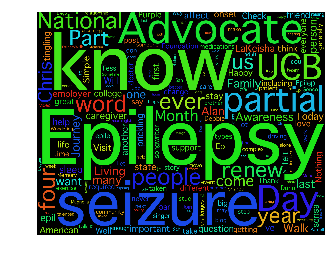

In [8]:
#with_comments = df[df.comments_count>0]
df = df[df.message.isnull() == False]
words = df['message'].map(str).to_string()
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(
                      font_path='/Library/Fonts/Sathu.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('./my_wordcloud.png', dpi=300)
plt.show()

## Create a new column with the total number of counts including likes, comments, and shares and then create another column with the zscore based on the total count.

## Find the posts that are significant using a cutoff threshold of z > 1.57


In [9]:
#df.sort_values(by='comments_count',ascending=True)

df['total_count'] = df.likes_count+df.comments_count+df.shares_count
df[['likes_count','comments_count','shares_count','total_count']] 
df['zscore']=(df.total_count - df.total_count.mean())/df.total_count.std(ddof=0)
significant = df[df.zscore > 1.57]
significant.sort_values(by='zscore',ascending=False)


,Unnamed: 0,from_id,from_name,message,created_time,type,link,id,likes_count,comments_count,shares_count,total_count,zscore
371,372,126245912663,Epilepsy Advocate,"In honor of Epilepsy Awareness Month, we�re as...",2012-11-02T12:00:25+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10151323335197664,1518,99,1673,3290,9.208483
5,6,126245912663,Epilepsy Advocate,"Living each day with a chronic disease, no one...",2015-08-04T16:30:07+0000,link,http://shout.lt/82BX,126245912663_10153614271767664,1923,49,411,2383,6.454502
7,8,126245912663,Epilepsy Advocate,Being a caregiver has a unique set of challeng...,2015-07-31T16:36:27+0000,link,http://shout.lt/8PqD,126245912663_10153604727942664,1738,38,374,2150,5.747029
10,11,126245912663,Epilepsy Advocate,"YOU, yes you, can impact the lives of patients...",2015-07-29T19:41:13+0000,link,http://shout.lt/8G4S,126245912663_10153600464812664,1655,49,408,2112,5.631648
4,5,126245912663,Epilepsy Advocate,Did you know that sleep deprivation can be a #...,2015-08-05T14:40:06+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10153616511422664,866,58,896,1820,4.745030
398,399,126245912663,Epilepsy Advocate,Eight more days until the start of Epilepsy Aw...,2012-10-24T11:30:16+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10151307831787664,1086,75,559,1720,4.441393
367,368,126245912663,Epilepsy Advocate,You�d better believe there are epilepsy awaren...,2012-11-08T13:00:34+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10151333158982664,901,30,652,1583,4.025412
297,298,126245912663,Epilepsy Advocate,March 26th is Purple Day � a day to wear purpl...,2014-03-19T13:15:01+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10152375339312664,509,20,1038,1567,3.976830
2,3,126245912663,Epilepsy Advocate,UCB and Epilepsy Advocate are supporting the e...,2015-08-22T11:17:46+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10153658779777664,1153,29,216,1398,3.463684
358,359,126245912663,Epilepsy Advocate,"If you care for someone with epilepsy, your pe...",2012-11-26T12:05:19+0000,photo,https://www.facebook.com/epilepsyadvocate/phot...,126245912663_10151360160502664,826,35,427,1288,3.129684


### The text document is preprocessed in such a way that the frequency of co-occurrence word-pair is easily counted from the text document and reduces the effort of extracting collocation. The preprocessing technique consists of the following steps:

    * The HTML tags and scripts are removed if it is a web document
    * Special characters including numeric digits are eliminated. 
    * Stop-words are removed



In [10]:
def post_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    longer_words = re.sub(r'\b\w{1,2}\b', '', letters_only)
    #
    # 3. Convert to lower case, split into individual words
    words = longer_words.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(STOPWORDS)
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.
    return( " ".join( meaningful_words ))

In [11]:
raw_docs = list(significant.message)
docs = []
for doc in raw_docs:
    docs.append(post_to_words(doc))
links = list(significant.link)

In [12]:
import numpy as np
import textmining
import lda
from nltk.corpus import stopwords
from __future__ import print_function

In [13]:
titles = links

tdm = textmining.TermDocumentMatrix()

# Add the documents
for doc in docs:
    tdm.add_doc(doc)

# create a temp variable with doc-term info
temp = list(tdm.rows(cutoff=1))

# get the vocab from first row
vocab = tuple(temp[0])

# get document-term matrix from remaining rows
X = np.array(temp[1:])

print("\n** Output produced by the textmining package...")

# document-term matrix
print("* The 'document-term' matrix")
print("type(X): {}".format(type(X)))
print("shape: {}".format(X.shape))
#print("X:", X, sep="\n" )

# the vocab
print("\n* The 'vocabulary':")
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}".format(len(vocab)))
#print("vocab:", vocab, sep="\n")

# titles for each story
#print("type(titles): {}".format(type(titles)))
#print("len(titles): {}".format(len(titles)))
#print("titles:", titles, sep="\n", end="\n\n")




** Output produced by the textmining package...
* The 'document-term' matrix
type(X): <type 'numpy.ndarray'>
shape: (28, 339)

* The 'vocabulary':
type(vocab): <type 'tuple'>
len(vocab): 339


# Display the top 3-gram topics from the facebook posts

In [14]:

model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 4
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: advocate app community
Topic 1: impact certain medications
Topic 2: let know others
Topic 3: loved biggest ones
Topic 4: events epilepsyadvocate patients
Topic 5: another creating tell
Topic 6: start thinking right
Topic 7: epilepsy four word
Topic 8: partial complex seizures
Topic 9: purple ucb day
Topic 10: album photo everyone
Topic 11: sleep doctor day
Topic 12: share comments seizure
Topic 13: one seizures epilepsy
Topic 14: know onset greatly
Topic 15: epilepsy memory issues
Topic 16: people struggle many
Topic 17: stories support care
Topic 18: national stay strong
Topic 19: awareness epilepsy month


# Map the posts to the topics

In [15]:
doc_topic = model.doc_topic_
for i in range(len(titles)):
    print("{}\n\ttopic: {}".format(titles[i], doc_topic[i].argmax()))

https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153658881302664/?type=1
	topic: 3
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153658779777664/?type=1
	topic: 7
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153616511422664/?type=1
	topic: 11
http://shout.lt/82BX
	topic: 1
http://shout.lt/8PqD
	topic: 1
http://shout.lt/8G4S
	topic: 1
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153528522792664/?type=1
	topic: 11
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153517975997664/?type=1
	topic: 15
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153476401632664/?type=1
	topic: 16
https://www.facebook.com/epilepsyadvocate/photos/a.10150442556527664.424692.126245912663/10153310371357664/?type=1
	topic: 18
https://www.facebook.com/ep